# Titanic Survival Classification

In [3]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import missingno

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [4]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [5]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
test_data.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [7]:
print(f'Training Data\nnumber of rows: {train_data.shape[0]}\nnumber of columns: {train_data.shape[1]}')
print(f'Testing Data\nnumber of rows: {test_data.shape[0]}\nnumber of columns: {test_data.shape[1]}')

Training Data
number of rows: 891
number of columns: 12
Testing Data
number of rows: 418
number of columns: 11


# Exploratory Data Analysis

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


<AxesSubplot:>

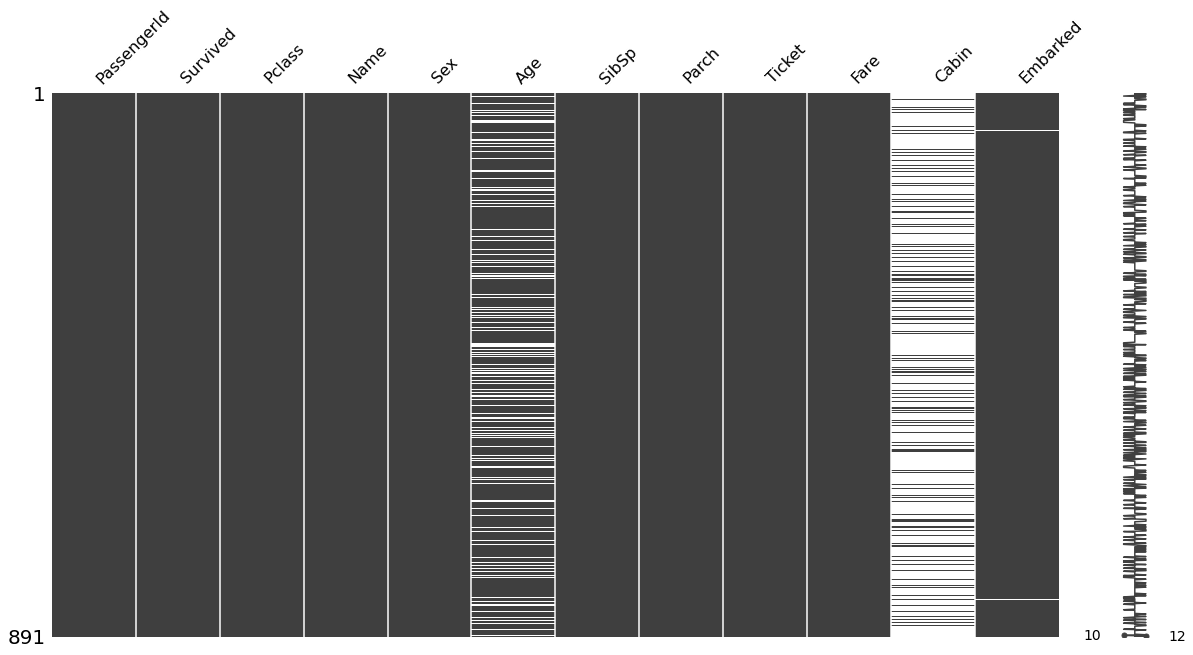

In [12]:
missingno.matrix(train_data, figsize=(20,10))

<AxesSubplot:>

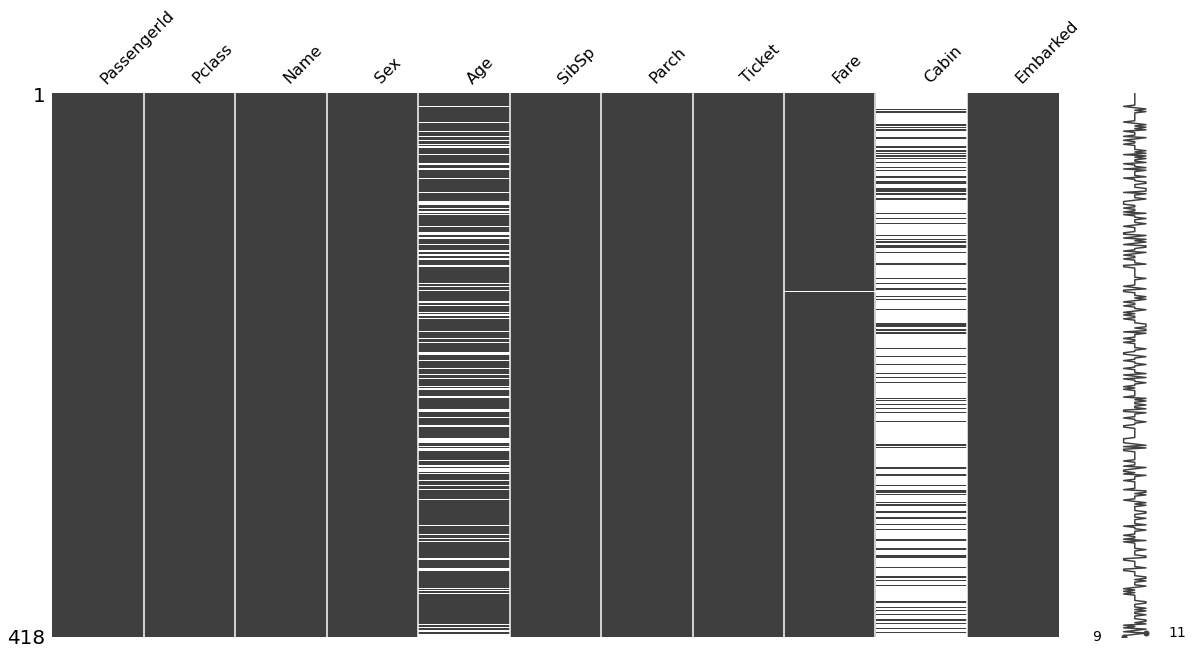

In [13]:
missingno.matrix(test_data, figsize=(20,10))

In [14]:
cols_to_exclude = ['PassengerId', 'Name', 'Ticket', 'Cabin']

df_train = train_data.drop(cols_to_exclude, axis=1)
df_test = test_data.drop(cols_to_exclude, axis=1)

In [15]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [16]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [17]:
# For categorical variables
def count_plot(col):
    
    plt.figure(figsize=(14,10))
    sns.countplot(x=col, hue='Survived', data=df_train)
    plt.legend(['Not Survived', 'Survived'], loc='upper right')
    plt.title(f'Survival based on {col}')
    plt.show()

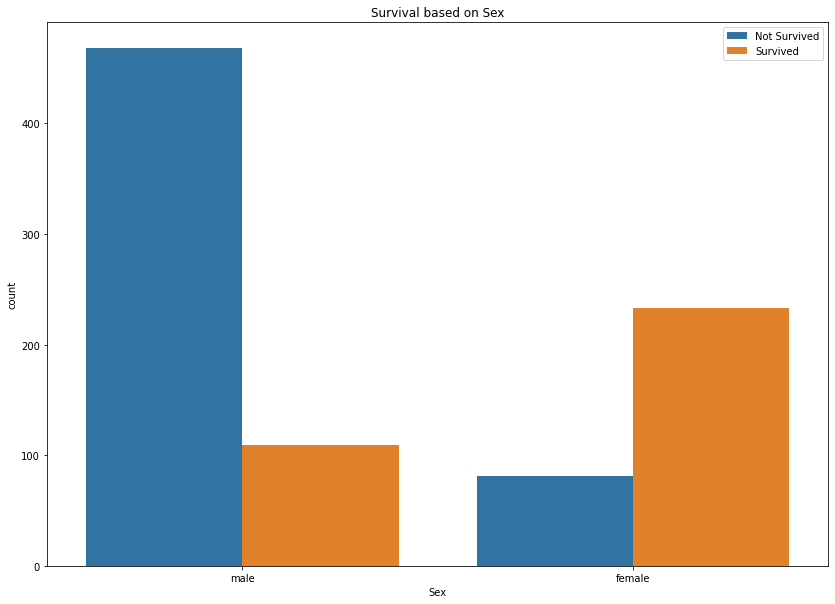

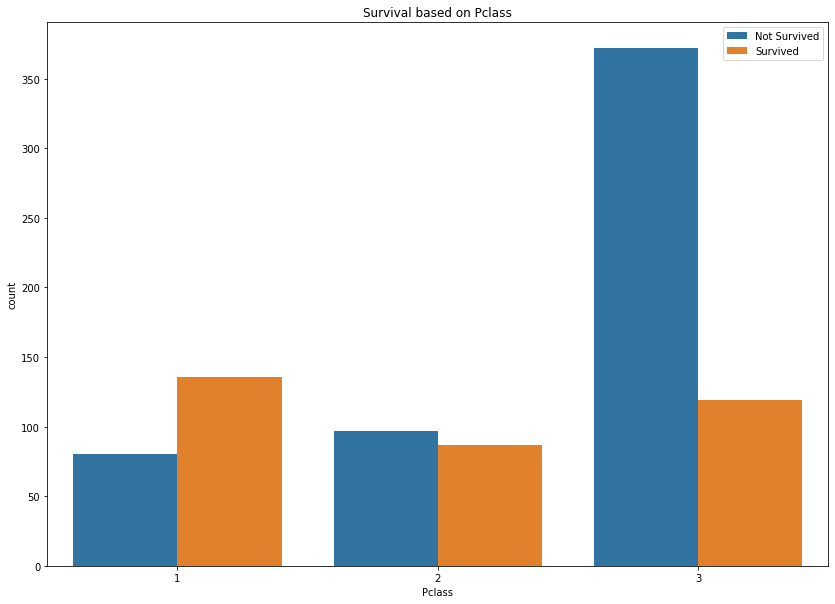

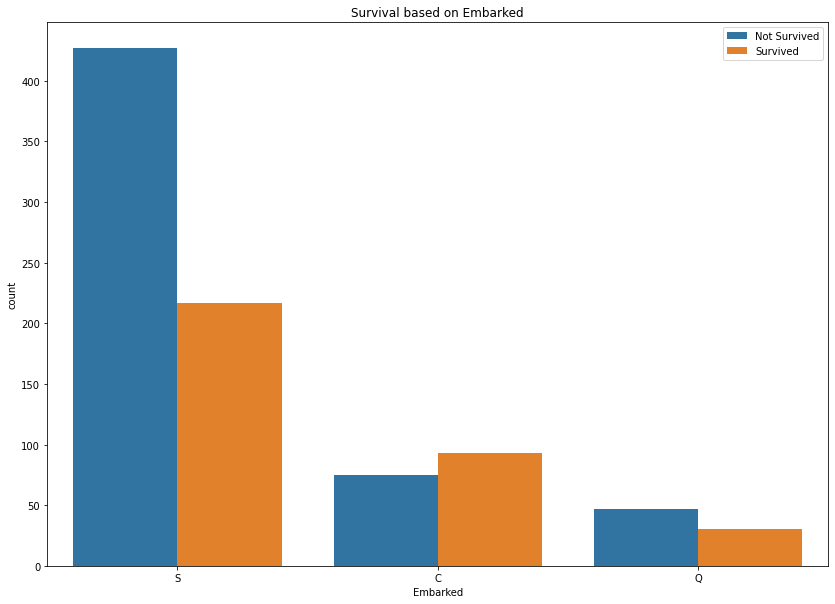

In [18]:
categorical_features = ['Sex', 'Pclass', 'Embarked']

for i in categorical_features:
    count_plot(i)
    print('==========\n==========')

In [19]:
def continuous_plot(col):
    
    fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(18,10))
    
    sns.distplot(df_train[df_train.Survived==0][col], label='Not Survived', hist=True, color='#F1A99E', ax=axs[0])
    sns.distplot(df_train[df_train.Survived==1][col], label='Survived', hist=True, color='#9EF1E1', ax=axs[0])
    
    sns.distplot(df_train[col], label='Training dataset', hist=False, color='#F1A99E', ax=axs[1])
    sns.distplot(df_test[col], label='Testing dataset', hist=False, color='#9EF1E1', ax=axs[1])
    
    axs[0].legend(loc='upper right', prop={'size': 12})
    axs[1].legend(loc='upper right', prop={'size': 12})
    
    plt.show()

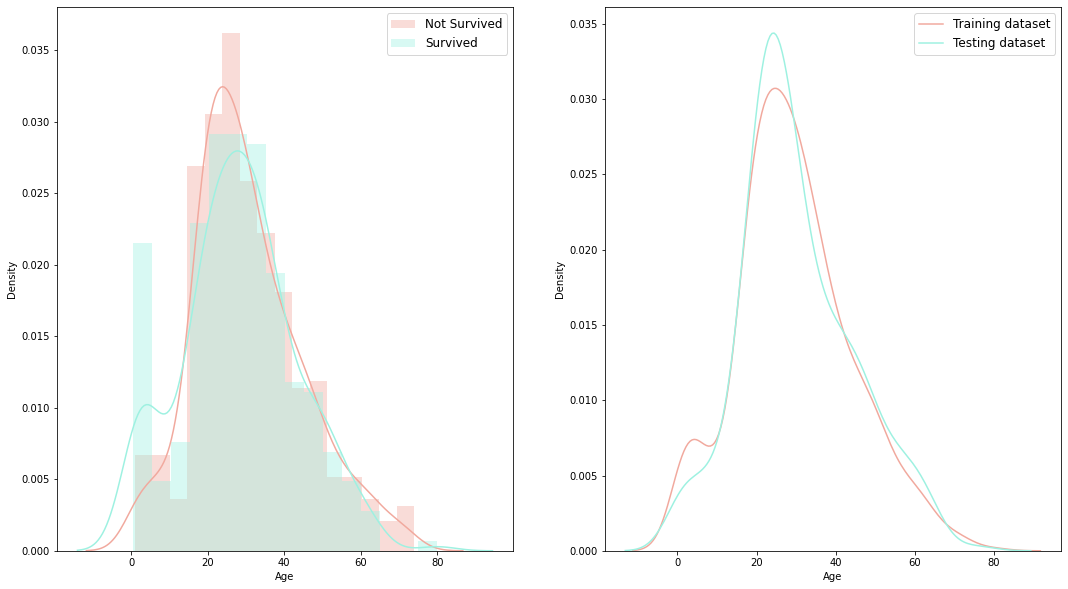

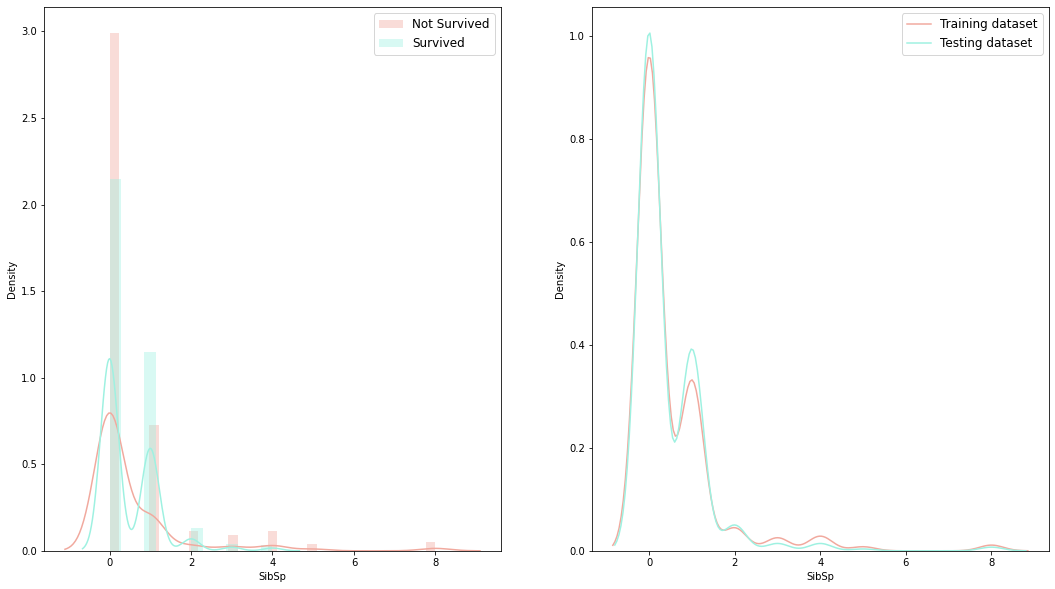

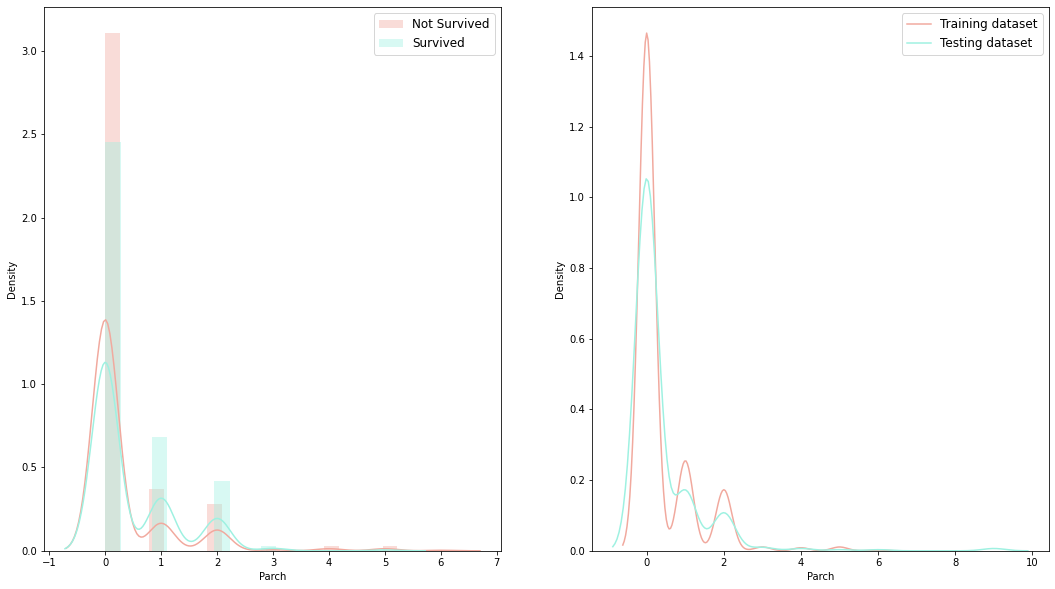

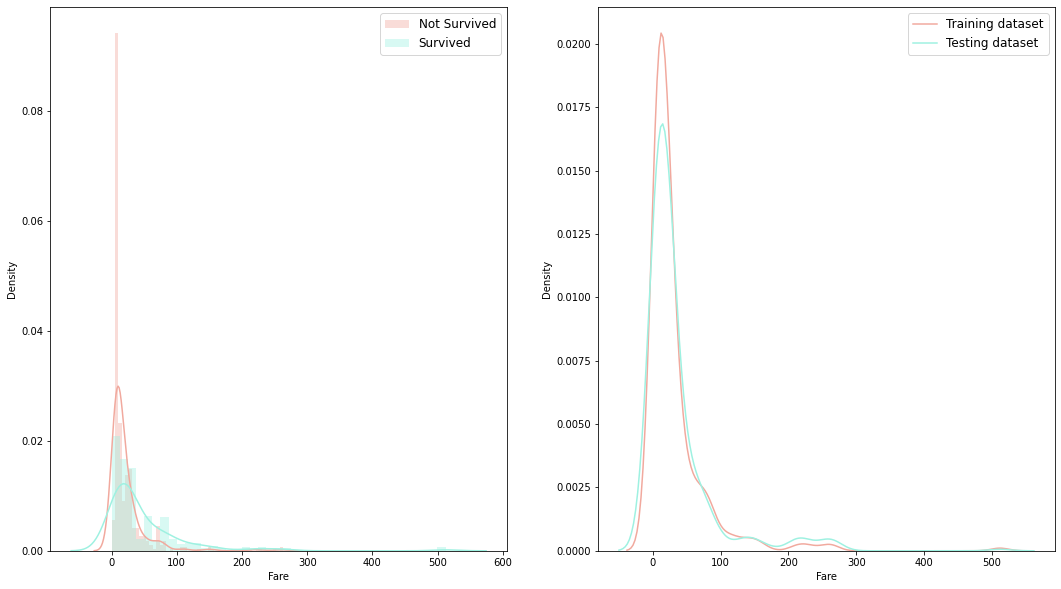

In [20]:
continuous_features = ['Age', 'SibSp', 'Parch', 'Fare']

for i in continuous_features:
    continuous_plot(i)
    print('==========\n==========')

# Feature Engineering

**Dealing with missing values**

In [21]:
age_without_na = df_train.Age[df_train.Age.notna()==True]
MEDIAN_AGE = np.median(age_without_na)

df_train.Age.fillna(MEDIAN_AGE, inplace=True)
df_test.Age.fillna(MEDIAN_AGE, inplace=True)

In [22]:
df_train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [23]:
df_test.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [24]:
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [25]:
df_train.Embarked.fillna('S', inplace=True)
df_test.Fare.fillna(0, inplace=True)

**Standardization and Encoding**

In [26]:
ss = StandardScaler()
def standardize(col):
    ss.fit(df_train[col].values.reshape(-1,1))
    df_train[col] = ss.transform(df_train[col].values.reshape(-1,1))
    df_test[col] = ss.transform(df_test[col].values.reshape(-1,1))
    
for i in continuous_features:
    standardize(i)
    
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,-0.565736,0.432793,-0.473674,-0.502445,S
1,1,1,female,0.663861,0.432793,-0.473674,0.786845,C
2,1,3,female,-0.258337,-0.474545,-0.473674,-0.488854,S
3,1,1,female,0.433312,0.432793,-0.473674,0.420730,S
4,0,3,male,0.433312,-0.474545,-0.473674,-0.486337,S


In [27]:
le = LabelEncoder()
df_train['Embarked'] = le.fit_transform(df_train['Embarked'])
df_test['Embarked'] = le.fit_transform(df_test['Embarked'])

In [28]:
ohe = OneHotEncoder()
ohe.fit(df_train[['Sex']])
transformed = ohe.transform(df_train[['Sex']]).toarray()

In [29]:
df_train[['male', 'female']] = transformed

In [30]:
test_transformed = ohe.transform(df_test[['Sex']]).toarray()

In [31]:
df_test[['male','female']] = test_transformed

In [32]:
df_train.drop(['Sex'], axis=1, inplace=True)
df_test.drop(['Sex'], axis=1, inplace=True)

# Machine Learning

In [33]:
X = df_train.iloc[:,1:9]
Y = df_train.iloc[:,0]

X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.20, random_state=1)

In [34]:
print(X_train.shape, X_valid.shape, Y_train.shape, Y_valid.shape)

(712, 8) (179, 8) (712,) (179,)


In [35]:
model = {'Model':[], 'Accuracy':[]}

## Support Vector Classifier

In [36]:
svc = SVC()
svc.fit(X_train, Y_train)
acc = svc.score(X_valid, Y_valid)
print(f"Accuracy with Support Vector Classifier: {acc*100:0.2f}%")
model['Model'].append('Support Vector Classifier')
model['Accuracy'].append(acc)

Accuracy with Support Vector Classifier: 79.33%


## Random Forest Classifier

In [37]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
acc = rfc.score(X_valid, Y_valid)
print(f"Accuracy with Random Forest Classifier: {acc*100:0.2f}%")
model['Model'].append('Random Forest Classifier')
model['Accuracy'].append(acc)

Accuracy with Random Forest Classifier: 78.77%


## XGBoost Classifier

In [38]:
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)
acc = xgb.score(X_valid, Y_valid)
print(f"Accuracy with XGBoost Classifier: {acc*100:0.2f}%")
model['Model'].append('XGBoost Classifier')
model['Accuracy'].append(acc)

Accuracy with XGBoost Classifier: 77.65%


In [39]:
model_df = pd.DataFrame(model)
model_df

,Model,Accuracy
0,Support Vector Classifier,0.793296
1,Random Forest Classifier,0.787709
2,XGBoost Classifier,0.776536


### Support Vector Classifier produced the best score. So we will predict using SVC

In [40]:
df_test.head(10)

,Pclass,Age,SibSp,Parch,Fare,Embarked,male,female
0,3,0.394887,-0.474545,-0.473674,-0.490783,1,0.0,1.0
1,3,1.355510,0.432793,-0.473674,-0.507479,2,1.0,0.0
2,2,2.508257,-0.474545,-0.473674,-0.453367,1,0.0,1.0
3,3,-0.181487,-0.474545,-0.473674,-0.474005,2,0.0,1.0
4,3,-0.565736,0.432793,0.767630,-0.401017,2,1.0,0.0
5,3,-1.180535,-0.474545,-0.473674,-0.462679,2,0.0,1.0
6,3,0.049062,-0.474545,-0.473674,-0.494810,1,1.0,0.0
7,2,-0.258337,0.432793,0.767630,-0.064516,2,0.0,1.0
8,3,-0.873136,-0.474545,-0.473674,-0.502864,0,1.0,0.0
9,3,-0.642586,1.340132,-0.473674,-0.162169,2,0.0,1.0


In [41]:
predictions = svc.predict(df_test)
pd.Series(predictions).value_counts()

0    264
1    154
dtype: int64

In [43]:
dummy_df_test = pd.read_csv('test.csv') # to get passenger ids for submission
pass_ids = dummy_df_test.iloc[:,0]
pass_ids

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [44]:
submission = pd.DataFrame({'PassengerId':pass_ids, 'Survived':predictions})

In [ ]:
# submission.to_csv('titanic_submission.csv', index=False)